In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기 (인코딩 설정)
df = pd.read_csv('서울특별시_전동킥보드_견인_현황_20220731.csv', encoding='euc-kr')

# 데이터 확인
print(df.head())


   번호         신고일  구정보                     주소                  유형         조치일
0   1  2021-07-15  동작구   서울특별시 동작구 상도동 215-45      점자블록, 엘리베이터 입구  2021-07-15
1   2  2021-07-15  동작구   서울특별시 동작구 상도동 172-28               보도 중앙  2021-07-15
2   3  2021-07-15  동작구    서울특별시 동작구 대방동 356-2       버스정류장, 택시 승강장  2021-07-15
3   4  2021-07-15  동작구    서울특별시 동작구 대방동 354-1       버스정류장, 택시 승강장  2021-07-15
4   5  2021-07-15  동작구  서울특별시 동작구 신대방동 460-30  보도와 차도가 구분된 도로의 차도  2021-07-15


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq


Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'


In [3]:
plt.rc('font', family = 'Malgun Gothic')

In [ ]:
# 주소 칼럼에서 동 추출
df['동'] = df['주소'].str.split().str[-2]

# 동 추출 결과 확인
print(df['동'])

0         상도동
1         상도동
2         대방동
3         대방동
4        신대방동
         ... 
60600     사당동
60601     봉천동
60602     사당동
60603     사당동
60604     면목동
Name: 동, Length: 60605, dtype: object


In [ ]:
# '동'별로 불법주차 개수 계산
dong_counts = df['동'].value_counts().reset_index()
dong_counts.columns = ['동', '불법주차 개수']

# '불법주차 개수'를 기준으로 내림차순 정렬
sorted_dong_counts = dong_counts.sort_values('불법주차 개수', ascending=False)

# 500개 이상인 동 필터링
filtered_dong_counts = sorted_dong_counts[sorted_dong_counts['불법주차 개수'] >= 500]

#
print(filtered_dong_counts)

        동  불법주차 개수
0     봉천동     2698
1   성수동2가     2318
2     서초동     2302
3    여의도동     2031
4     서교동     1798
5     사당동     1374
6     문정동     1334
7     가락동     1275
8     구로동     1119
9     동교동     1039
10    대치동     1021
11  성수동1가     1016
12    장안동     1002
13    신림동      975
14    상도동      785
15    삼성동      731
16    역삼동      719
17    신길동      717
18    방이동      704
19    자양동      701
20     목동      684
21    잠실동      681
22    송파동      675
23    면목동      652
24    양재동      610
25    오금동      588
26    합정동      578
27    화양동      557
28    망원동      537
29    화곡동      524
30    마곡동      524


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

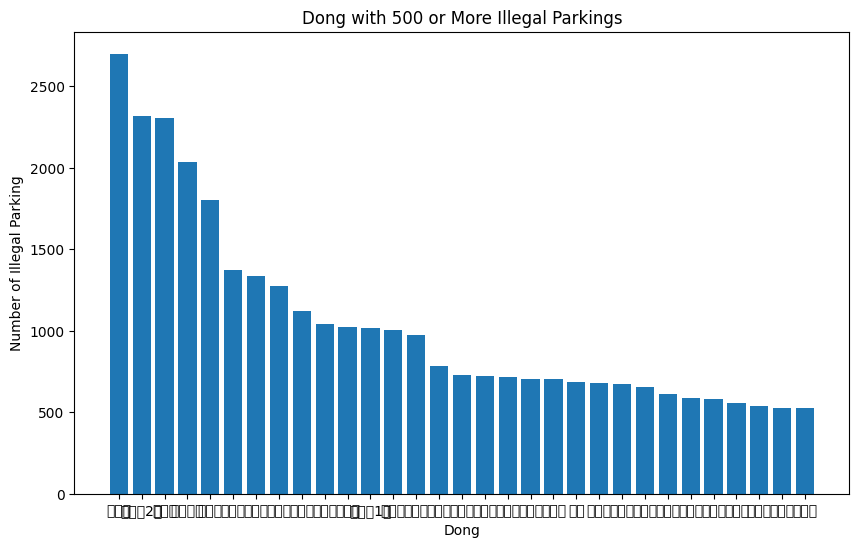

In [ ]:
# 500개 이상인 동 필터링
filtered_dong_counts = sorted_dong_counts[sorted_dong_counts['불법주차 개수'] >= 500]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(filtered_dong_counts['동'], filtered_dong_counts['불법주차 개수'])
plt.xlabel('Dong')
plt.ylabel('Number of Illegal Parking')
plt.title('Dong with 500 or More Illegal Parkings')

# 그래프 출력
plt.show()

In [ ]:
# 신고일 별 불법주차 수 계산
daily_counts = df['신고일'].value_counts().reset_index()
daily_counts.columns = ['신고일', '불법주차 수']

# 결과 출력
print(daily_counts)

           신고일  불법주차 수
0   2022-03-10     443
1   2022-03-17     414
2   2022-06-07     412
3   2022-03-15     401
4   2022-02-15     401
..         ...     ...
253 2021-08-31      74
254 2022-03-25      73
255 2022-06-30      72
256 2021-08-27      69
257 2021-07-15      35

[258 rows x 2 columns]


In [4]:
# 신고일을 날짜 형식으로 변환
df['신고일'] = pd.to_datetime(df['신고일'])

# 월별로 불법주차 수 계산
monthly_counts = df.groupby(df['신고일'].dt.to_period('M')).size().reset_index(name='불법주차 수')

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts['신고일'].astype(str), monthly_counts['불법주차 수'])
plt.xlabel('월')
plt.ylabel('불법주차 수')
plt.title('월별 불법주차 수')

# 그래프 출력
plt.show()

# 월별 결과 출력
print(monthly_counts)

NameError: ignored

In [ ]:
# 2022-03-10의 데이터 필터링
target_date = '2022-03-10'
filtered_df = df[df['신고일'] == target_date]

# 동별 불법주차 개수 계산 및 내림차순 정렬
result = filtered_df['동'].value_counts().sort_values(ascending=False)

# 결과 출력
print(result)

서초동      35
자양동      30
봉천동      22
동교동      19
서교동      18
         ..
한강로3가     1
천호동       1
도봉동       1
홍제동       1
당산동2가     1
Name: 동, Length: 110, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

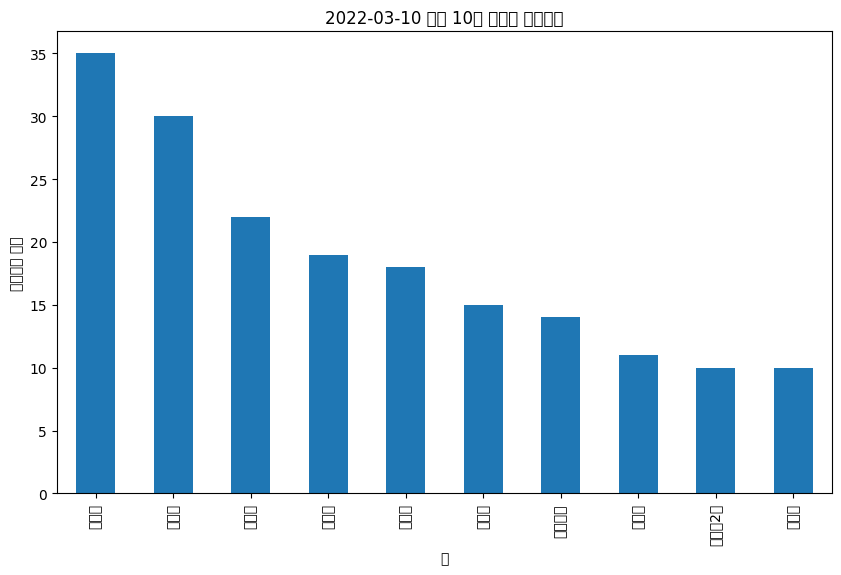

In [ ]:
# 10개 이상의 신고건수 필터링
result_filtered = result[result >= 10]

# 그래프 그리기
plt.figure(figsize=(10, 6))
result_filtered.plot(kind='bar')
plt.xlabel('동')
plt.ylabel('불법주차 개수')
plt.title('2022-03-10 기준 10개 이상의 신고건수')

# 그래프 출력
plt.show()

In [ ]:
# 2022-03-17의 데이터 필터링
target_date = '2022-03-17'
filtered_df = df[df['신고일'] == target_date]

# 동별 불법주차 개수 계산 및 내림차순 정렬
result = filtered_df['동'].value_counts().sort_values(ascending=False)

# 결과 출력
print(result)

자양동     31
서초동     21
구의동     19
구로동     18
봉천동     16
        ..
창천동      1
남현동      1
경운동      1
서린동      1
종로1가     1
Name: 동, Length: 117, dtype: int64


In [ ]:
# 2022-06-07의 데이터 필터링
target_date = '2022-06-07'
filtered_df = df[df['신고일'] == target_date]

# 동별 불법주차 개수 계산 및 내림차순 정렬
result = filtered_df['동'].value_counts().sort_values(ascending=False)

# 결과 출력
print(result)

서초동      29
봉천동      28
장안동      19
삼성동      18
여의도동     16
         ..
도봉동       1
문래동6가     1
현석동       1
하계동       1
휘경동       1
Name: 동, Length: 106, dtype: int64
